In [67]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("data/MNIST", one_hot=True)

batch_size    = 64
latent_space  = 128
learning_rate = 0.1

ae_weights = {
    "encoder_w": tf.Variable(tf.truncated_normal([784, latent_space], stddev=0.1)),
    "encoder_b": tf.Variable(tf.truncated_normal([latent_space], stddev=0.1)),
    "decoder_w": tf.Variable(tf.truncated_normal([latent_space, 784], stddev=0.1)),
    "decoder_b": tf.Variable(tf.truncated_normal([784], stddev=0.1)),
}

ae_input = tf.placeholder(tf.float32, [None, 784])
hidden = tf.nn.sigmoid( tf.matmul(ae_input, ae_weights["encoder_w"]) + ae_weights["encoder_b"] )
visible_logits = tf.matmul(hidden, ae_weights["decoder_w"]) + ae_weights["decoder_b"]
visible = tf.nn.sigmoid(visible_logits)

# разреживание слабо активированных нейронов
noised_hidden = tf.nn.relu(hidden - 0.1) + 0.1
noised_visible = tf.nn.sigmoid(tf.matmul(noised_hidden, ae_weights["decoder_w"]) + ae_weights["decoder_b"])

ae_cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=visible_logits, labels=ae_input))

# разреживание
rho = 0.1
beta = 0.7

data_rho = tf.reduce_mean(hidden, 0)
# расстояние Кульбака
reg_cost = -tf.reduce_mean(tf.log(data_rho / rho) * rho + tf.log((1-data_rho) / (1-rho)) * (1-rho))

# оценка вместе регуляризацией
total_cost = ae_cost + beta * reg_cost

# точность
accuracy = tf.reduce_mean(1 - tf.abs(ae_input - visible))

# минимизация ф-ии стоимости
ae_op = tf.train.AdagradOptimizer(learning_rate).minimize(total_cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(100000):
    x_batch, _ = mnist.train.next_batch(batch_size)
    sess.run(ae_op, feed_dict={ae_input: x_batch})

        
print("\nAccuracy", sess.run(accuracy, feed_dict={ae_input: mnist.test.images}))

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz

Accuracy 0.92170024


Оригинал и реконструированные:


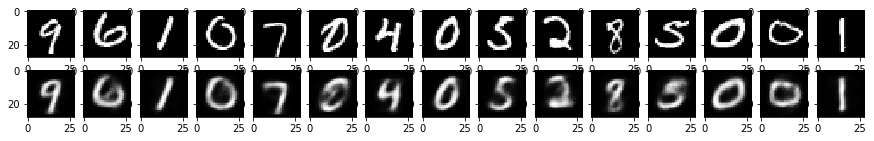

Оригинал и восстановленные из «обрезанного» скрытого слоя:


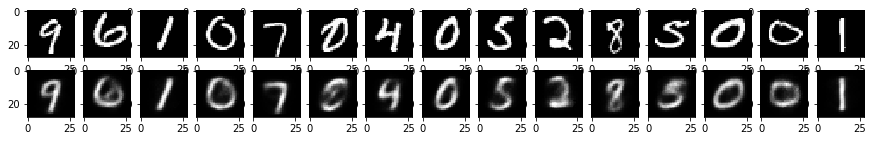

In [68]:
import matplotlib.pyplot as plt
import math

# Reshape the array into 28 x 28 array (2-dimensional array)
img_ae_input = tf.reshape(ae_input, [-1, 28, 28])
img_visible = tf.reshape(visible, [-1, 28, 28])
img_noised_visible = tf.reshape(noised_visible, [-1, 28, 28])

inp_pics, out_pics, noised_out_pics = sess.run(
    [img_ae_input, img_visible, img_noised_visible], 
    feed_dict={ae_input: x_batch})

examples_cnt = 15

print("Оригинал и реконструированные:")
plt.figure(figsize=(15, 2))
for i in range(examples_cnt):
    plt.subplot(2, examples_cnt, i + 1)
    plt.imshow(inp_pics[i], cmap='gray')

for i in range(examples_cnt):
    plt.subplot(2, examples_cnt, examples_cnt + i + 1)
    plt.imshow(out_pics[i], cmap='gray')   
plt.show()

print("Оригинал и восстановленные из «обрезанного» скрытого слоя:")
plt.figure(figsize=(15, 2))
for i in range(examples_cnt):
    plt.subplot(2, examples_cnt, i + 1)
    plt.imshow(inp_pics[i], cmap='gray')

for i in range(examples_cnt):
    plt.subplot(2, examples_cnt, examples_cnt + i + 1)
    plt.imshow(noised_out_pics[i], cmap='gray')
plt.show()

In [8]:
a_ = tf.placeholder(tf.float32, [5, 5])
b_ = tf.placeholder(tf.float32, [5, 5])

eq = tf.equal(a_, b_)
accuracy = tf.reduce_mean(tf.cast(eq, tf.float32))

a = np.array([[0, 1, 2, 1, 0],
              [4, 1, 0, 1, 0],
              [2, 0, 1, 1, 1],
              [1, 2, 3, 1, 0],
              [0, 4, 3, 2, 0]])

b = np.array([[0, 1, 0, 1, 0],
              [4, 1, 0, 1, 0],
              [2, 0, 1, 1, 1],
              [1, 2, 0, 1, 0],
              [0, 4, 3, 2, 0]])

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(accuracy, feed_dict={a_: a, b_: b}))

0.92
